AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

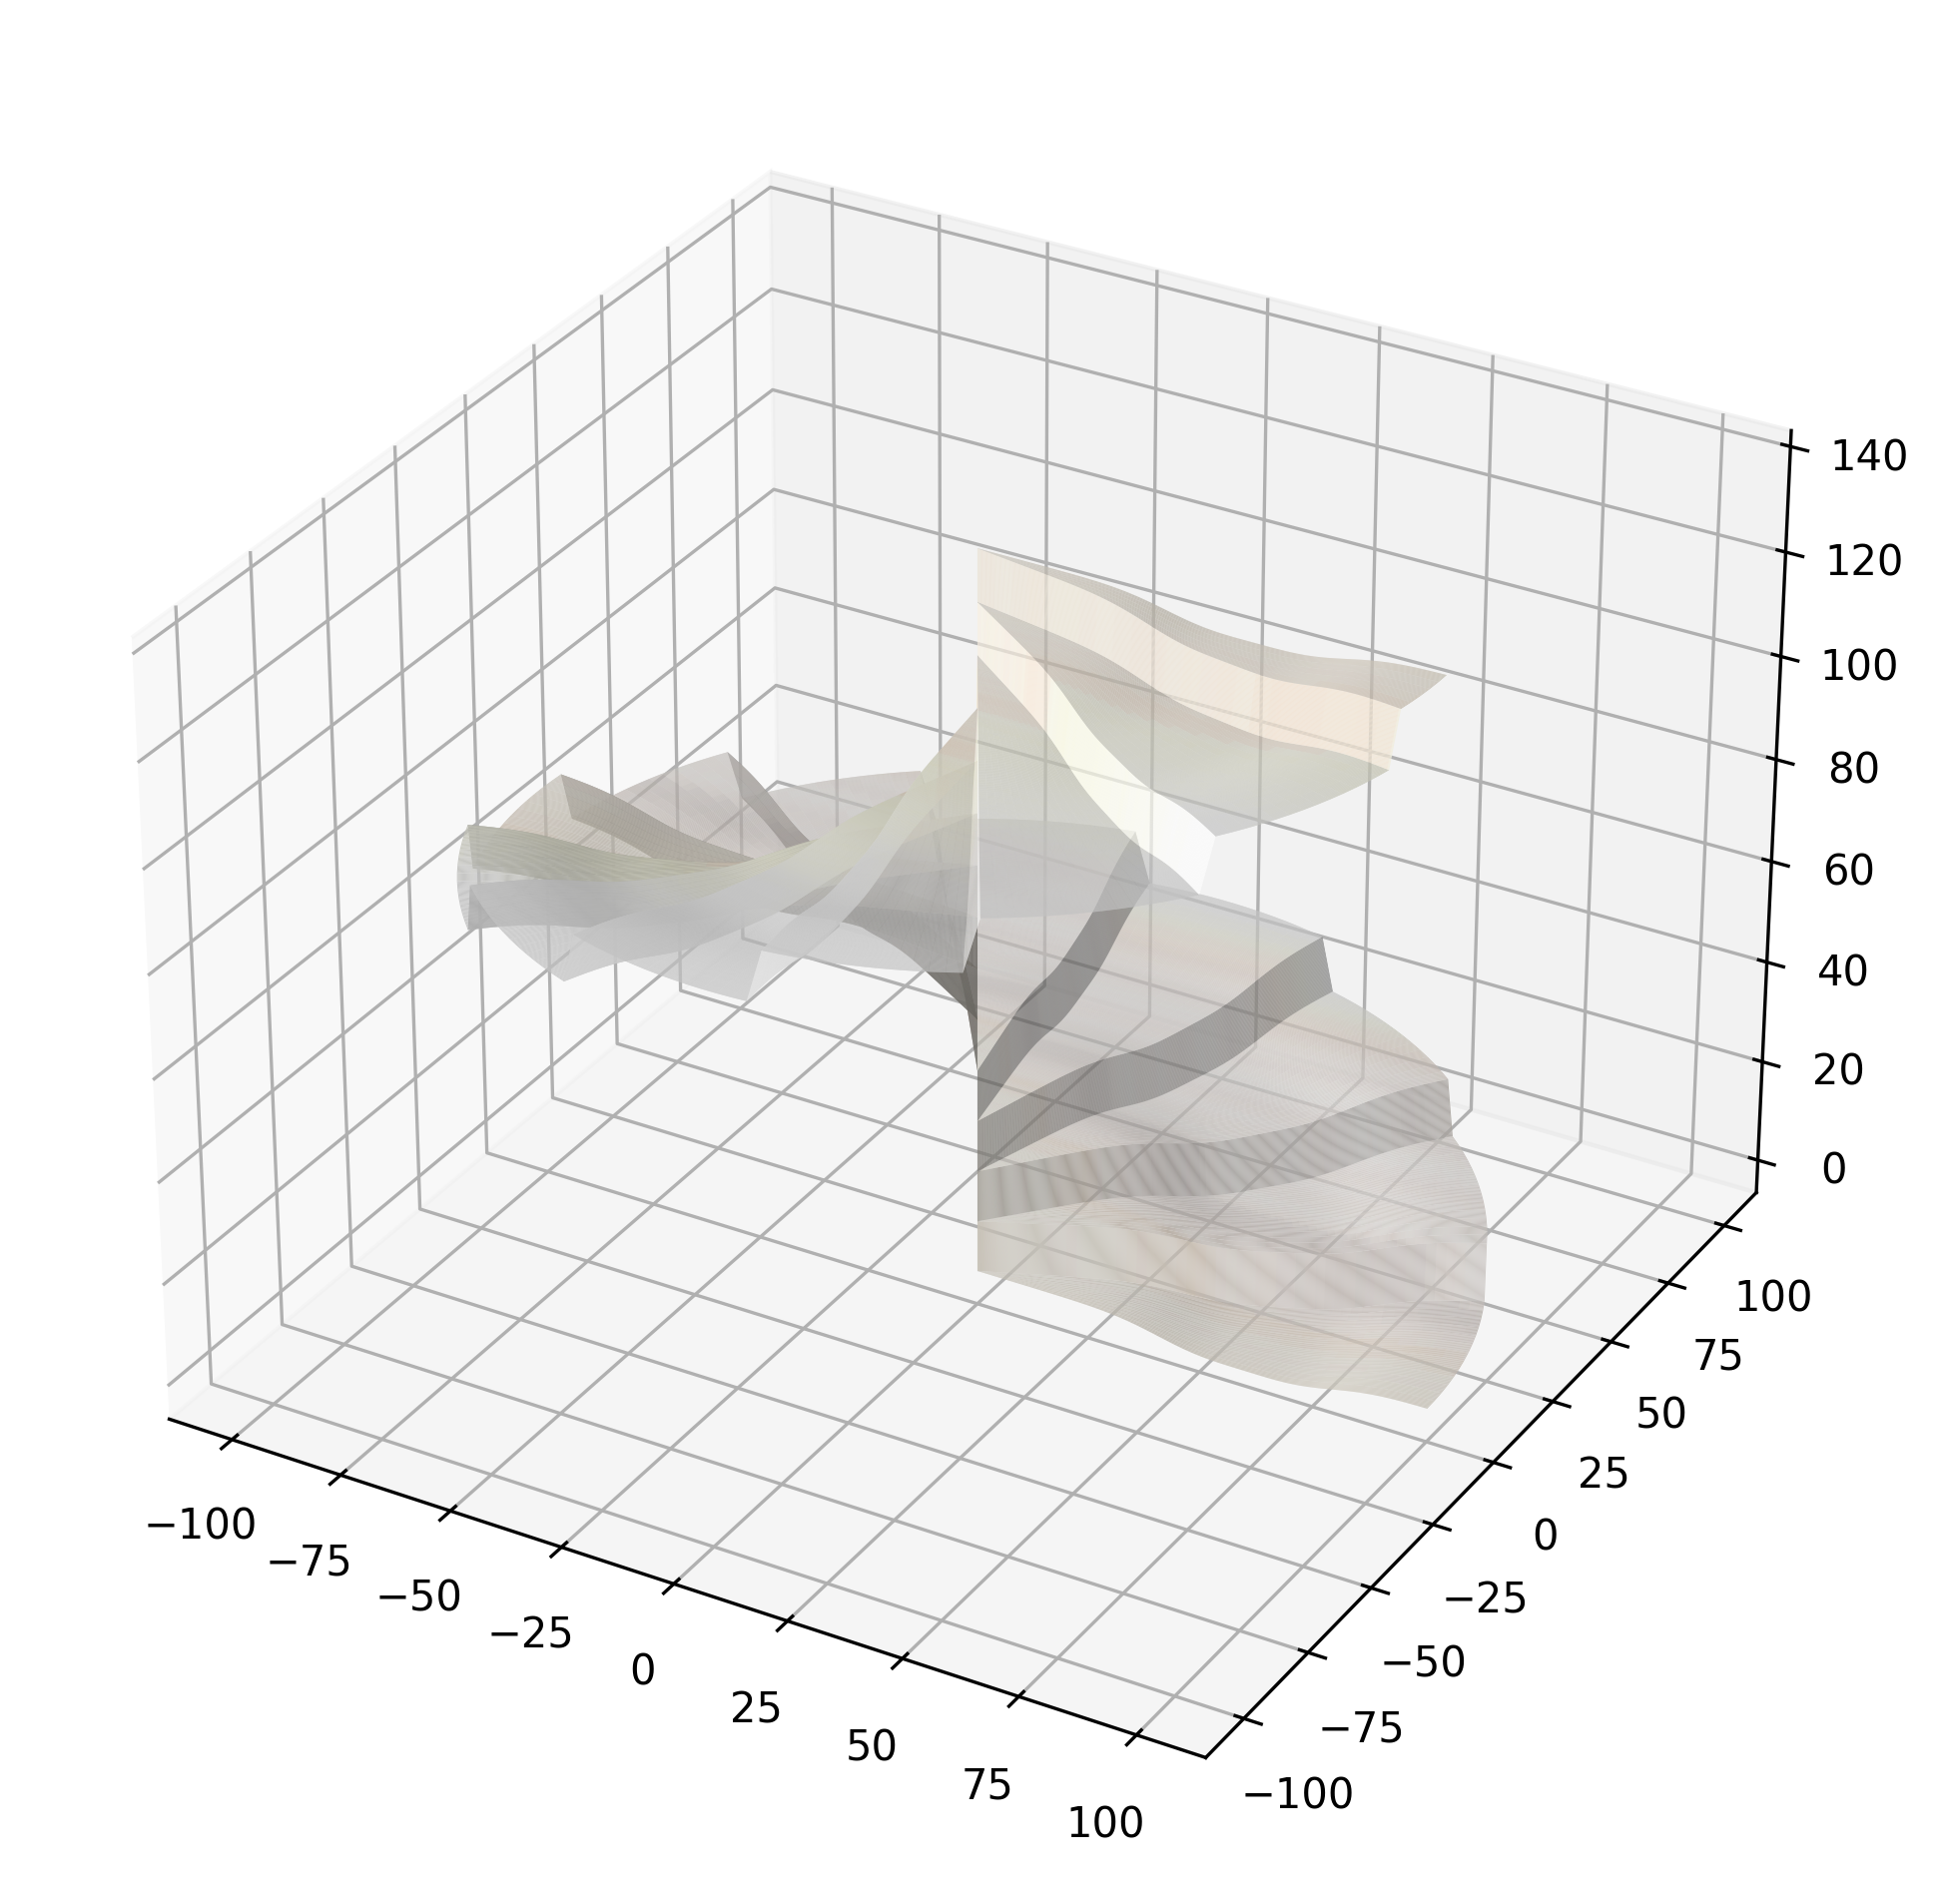

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 加载图片并提取颜色
def load_and_process_image(image_path):
    try:
        image = Image.open(image_path)
        resized_image = image.resize((1, 256))  # 将图片缩小为宽度为1，高度为256
        colors = np.array(resized_image)[:, 0, :3] / 255.0  # 归一化到[0, 1]
        return colors
    except FileNotFoundError:
        print(f"文件未找到: {image_path}")
        return None

# 增强颜色对比度和鲜艳度
def enhance_colors(colors, factor=1.5):
    enhanced = np.clip(colors * factor, 0, 1)  # 提升颜色的亮度，限制在[0, 1]范围内
    return enhanced

# 设置路径到你的实际图片文件
image_path = "/Users/xiaobuwei2003/Desktop/MCM/WechatIMG117.jpg"  # 替换为实际路径
colors = load_and_process_image(image_path)

if colors is not None:
    # 增强提取的颜色
    enhanced_colors = enhance_colors(colors, factor=2.0)

    # 创建增强后的颜色映射
    vivid_cmap = LinearSegmentedColormap.from_list("VividStoneGradient", enhanced_colors)

    # 扇形楼梯的极坐标设置
    r_vals = np.linspace(0, 100, 500)  # 从0到100cm的半径范围
    theta_vals = np.linspace(0, 2 * np.pi, 200)  # 从0到360度的角度范围

    R, Theta = np.meshgrid(r_vals, theta_vals)

    # 定义r-z函数，根据两个正态分布凹陷
    def r_z_function(r, center1, center2, depth, std_dev):
        gaussian1 = depth * np.exp(-((r - center1) ** 2) / (2 * std_dev**2))
        gaussian2 = depth * np.exp(-((r - center2) ** 2) / (2 * std_dev**2))
        return -(gaussian1 + gaussian2)

    # 正态分布的中心位置和参数
    center1, center2 = 50, 70  # 两个正态分布的中心
    depth = 3  # 凹陷的最大深度（单位：cm）
    std_dev = 10  # 正态分布的标准差

    # 计算r-z函数值
    Z = r_z_function(R, center1, center2, depth, std_dev)

    # 添加楼梯的高度增加
    height_increment = 10  # 每个步长的高度（单位：cm）
    angle_increment = np.radians(25)  # 25度转换为弧度
    height_steps = np.floor(Theta / angle_increment) * height_increment

    # 最终的z值，加上楼梯的高度
    Z += height_steps

    # 转换为笛卡尔坐标
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    # 根据Y方向的范围计算渐变
    gradient_y = (Y - Y.min()) / (Y.max() - Y.min())  # 归一化到[0, 1]

    # 绘制图像
    fig = plt.figure(figsize=(12, 8), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # 绘制表面，颜色基于Y方向渐变
    surface = ax.plot_surface(
        X, Y, Z, facecolors=vivid_cmap(gradient_y), rstride=1, cstride=1, alpha=0.9, linewidth=0, antialiased=True
    )
# Set the background color of the grid area to light gray
ax.w_xaxis.pane.fill = True
ax.w_yaxis.pane.fill = True
ax.w_zaxis.pane.fill = True
# Set gradient gray colors (you can adjust these values as needed)
ax.w_xaxis.pane.set_facecolor('indianred')  # Light gray
ax.w_yaxis.pane.set_facecolor('indianred')  # Medium gray
ax.w_zaxis.pane.set_facecolor('indianred')  # Dark gray

# Turn off the grid
ax.grid(False)
    # 自定义图形
ax.set_title('Spiral staircase diagram')
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')

    # 视角调整，向左旋转视角
ax.view_init(elev=30, azim=200)

plt.show()

